# Make Me Data Science VII

# Part 1 - Create Data

## Prepare PrepPy

In [ ]:
# ! git clone https://github.com/gitmystuff/preppy.git

In [ ]:
# import shutil

# # Source file path (within your Drive)
# source_file = '/content/drive/MyDrive/Colab Notebooks/preppy report.py'

# # Destination path (root of your Drive)
# destination_path = '/content/preppy/utils/report.py'

# # Copy the file
# shutil.copy(source_file, destination_path)

## Create the Data

### Seed the Project

In [ ]:
# seed
import random

seed_id = 123456789
random_state = random.seed(seed_id)
random_state

### Faker

In [ ]:
# pip install Faker

In [ ]:
state_names=["Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado", "Connecticut", "Delaware", "Florida", "Georgia", "Hawaii", "Idaho", "Illinois", "Indiana", "Iowa", "Kansas", "Kentucky", "Louisiana", "Maine", "Maryland", "Massachusetts", "Michigan", "Minnesota", "Mississippi", "Missouri", "Montana", "Nebraska", "Nevada", "New Hampshire", "New Jersey", "New Mexico", "New York", "North Carolina", "North Dakota", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah", "Vermont", "Virginia", "Washington", "West Virginia", "Wisconsin", "Wyoming"]

In [ ]:
# create demographic data
import numpy as np
import pandas as pd
from faker import Faker
fake = Faker()

output = []
for x in range(1000):
  binary = np.random.choice(['binary_1', 'binary_2'], p=[0.5, 0.5])
  output.append({
        'binary': binary, # sex assigned at birth
        'given_name': fake.first_name_female() if binary=='binary_1' else fake.first_name_male(),
        'surname': fake.last_name(),
        'date_of_birth': fake.date_of_birth(),
        'phone_number': fake.phone_number(),
        'email': fake.email(),
        'address': fake.address(),
        'city': fake.city(),
        'state': np.random.choice(state_names),
        'zipcode': fake.zipcode(),
        })

demographics = pd.DataFrame(output)
demographics.head()

,binary,given_name,surname,date_of_birth,phone_number,email,address,city,state,zipcode
0,binary_2,Kevin,Landry,1989-05-28,279.391.8227,rachelgonzalez@example.net,Unit 0834 Box 9260\nDPO AA 17860,Rachelfurt,Connecticut,02465
1,binary_2,Spencer,Robertson,2016-11-24,001-576-734-9772x71766,sylvia13@example.com,"659 Fitzpatrick Keys Suite 024\nPort Cynthia, ...",South Elizabethshire,New York,37282
2,binary_1,Erica,Hurley,1936-10-29,+1-204-665-5879x9860,jeanne31@example.net,"31799 Stephen Flats\nFostershire, NJ 18510",Novakshire,Pennsylvania,15896
3,binary_1,Lauren,Tucker,2008-06-27,8528925338,hartmichael@example.net,Unit 9036 Box 6259\nDPO AA 05068,Davidburgh,Nebraska,57592
4,binary_1,Toni,Jenkins,1920-12-21,+1-679-393-3485x37854,thompsonlisa@example.com,"1094 Rowland Cove Apt. 700\nBrownmouth, DE 54543",East Nicholastown,Vermont,91034


In [ ]:
def parse_address_v2(text):
  """
  Parses an address string into street address, city, state, and zipcode.
  This version handles potential variations in the input format.

  Args:
    text: The address string to parse.

  Returns:
    A dictionary containing the parsed address components.
  """

  try:
    # Split the input into lines
    lines = text.strip().split('\n')

    # Extract the street address from the first line
    street_address = lines[0].strip()

    # Extract the city, state, and zipcode from the second line
    city_state_zip = lines[1].strip().split(',')
    city = city_state_zip[0].strip()
    state_zip = city_state_zip[1].strip().split()
    state = state_zip[0].strip()
    zipcode = state_zip[1].strip()

    return {
        'street_address': street_address,
        'city': city,
        'state': state,
        'zipcode': zipcode
    }

  except (IndexError, ValueError):
    return None

# Example usage
text = "80974 Jeffrey Mountains\nWest Benjamin, IL 82801"
address = parse_address_v2(text)

if address:
  print(address)
else:
  print("Could not parse the address.")

{'street_address': '80974 Jeffrey Mountains', 'city': 'West Benjamin', 'state': 'IL', 'zipcode': '82801'}


In [ ]:
# Apply the parse_address function to each row of the 'address' column
demographics[['nu_address', 'nu_city', 'nu_state', 'nu_zipcode']] = demographics['address'].apply(lambda x: pd.Series(parse_address_v2(x)))

demographics.head()

,binary,given_name,surname,date_of_birth,phone_number,email,address,city,state,zipcode,nu_address,nu_city,nu_state,nu_zipcode
0,binary_2,Kevin,Landry,1989-05-28,279.391.8227,rachelgonzalez@example.net,Unit 0834 Box 9260\nDPO AA 17860,Rachelfurt,Connecticut,02465,NaN,NaN,NaN,NaN
1,binary_2,Spencer,Robertson,2016-11-24,001-576-734-9772x71766,sylvia13@example.com,"659 Fitzpatrick Keys Suite 024\nPort Cynthia, ...",South Elizabethshire,New York,37282,659 Fitzpatrick Keys Suite 024,Port Cynthia,MP,74681
2,binary_1,Erica,Hurley,1936-10-29,+1-204-665-5879x9860,jeanne31@example.net,"31799 Stephen Flats\nFostershire, NJ 18510",Novakshire,Pennsylvania,15896,31799 Stephen Flats,Fostershire,NJ,18510
3,binary_1,Lauren,Tucker,2008-06-27,8528925338,hartmichael@example.net,Unit 9036 Box 6259\nDPO AA 05068,Davidburgh,Nebraska,57592,NaN,NaN,NaN,NaN
4,binary_1,Toni,Jenkins,1920-12-21,+1-679-393-3485x37854,thompsonlisa@example.com,"1094 Rowland Cove Apt. 700\nBrownmouth, DE 54543",East Nicholastown,Vermont,91034,1094 Rowland Cove Apt. 700,Brownmouth,DE,54543


In [ ]:
# drop address, city, state, zipcode and rename nu_ etc.
demographics.drop(['address', 'city', 'state', 'zipcode'], axis=1, inplace=True)
demographics.rename(columns={'nu_address': 'address', 'nu_city': 'city', 'nu_state': 'state', 'nu_zipcode': 'zipcode'}, inplace=True)
demographics.head()

,binary,given_name,surname,date_of_birth,phone_number,email,address,city,state,zipcode
0,binary_2,Kevin,Landry,1989-05-28,279.391.8227,rachelgonzalez@example.net,NaN,NaN,NaN,NaN
1,binary_2,Spencer,Robertson,2016-11-24,001-576-734-9772x71766,sylvia13@example.com,659 Fitzpatrick Keys Suite 024,Port Cynthia,MP,74681
2,binary_1,Erica,Hurley,1936-10-29,+1-204-665-5879x9860,jeanne31@example.net,31799 Stephen Flats,Fostershire,NJ,18510
3,binary_1,Lauren,Tucker,2008-06-27,8528925338,hartmichael@example.net,NaN,NaN,NaN,NaN
4,binary_1,Toni,Jenkins,1920-12-21,+1-679-393-3485x37854,thompsonlisa@example.com,1094 Rowland Cove Apt. 700,Brownmouth,DE,54543


### Create Independent Variable Correlated with Class

In [ ]:
import numpy as np
import pandas as pd

def generate_feature(df, class_col, coeff, intercept):
    """
    Generates normally distributed feature data for a logistic regression model.

    Args:
        df: The pandas DataFrame containing the class column.
        class_col: The name of the class column (containing 0s and 1s).
        coeff: The coefficient for the feature in the logistic regression model.
        intercept: The intercept of the logistic regression model.

    Returns:
        A pandas Series containing the generated feature data.
    """

    # Generate probabilities based on the class
    probs = np.random.rand(len(df))  # Initial random probabilities
    probs = np.where(df[class_col] == 1, probs * 0.8 + 0.2, probs * 0.8)  # Adjust for class

    # Apply the inverse logit (logit) function
    logits = np.log(probs / (1 - probs))

    # Calculate the feature values
    feature_values = (logits - intercept) / coeff

    return pd.Series(feature_values)



### Make Classification

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

def make_linear_y(row):
  model = LogisticRegression()
  model.fit(X, y)
  coefficients = model.coef_
  intercept = model.intercept_
  f_of_x = intercept + coefficients[0][0]*row['informative_1'] + coefficients[0][1]*row['informative_2']
  # print(f_of_x[0])
  return f_of_x[0]

# Adjust the make_classification parameters:
# Set n_informative and n_redundant to values that sum to less than n_features
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, random_state=42)
df = pd.DataFrame(X, columns=['informative_1', 'informative_2'])
df = pd.concat([demographics, df], axis=1).reset_index(drop=True)

df['target'] = df.apply(make_linear_y, axis=1) # an independent variable
df['class'] = y # the dependent variable
df['corr_feature_class'] = generate_feature(df, 'class', 0.5, -1)
df.head()

,binary,given_name,surname,date_of_birth,phone_number,email,address,city,state,zipcode,informative_1,informative_2,target,class,corr_feature_class
0,binary_2,Kevin,Landry,1989-05-28,279.391.8227,rachelgonzalez@example.net,NaN,NaN,NaN,NaN,-0.999102,-0.663860,-0.904224,1,2.769979
1,binary_2,Spencer,Robertson,2016-11-24,001-576-734-9772x71766,sylvia13@example.com,659 Fitzpatrick Keys Suite 024,Port Cynthia,MP,74681,1.246686,1.153597,2.324370,1,2.782714
2,binary_1,Erica,Hurley,1936-10-29,+1-204-665-5879x9860,jeanne31@example.net,31799 Stephen Flats,Fostershire,NJ,18510,0.962777,0.859397,1.778217,1,2.609338
3,binary_1,Lauren,Tucker,2008-06-27,8528925338,hartmichael@example.net,NaN,NaN,NaN,NaN,-2.957441,2.033645,5.451235,1,4.873167
4,binary_1,Toni,Jenkins,1920-12-21,+1-679-393-3485x37854,thompsonlisa@example.com,1094 Rowland Cove Apt. 700,Brownmouth,DE,54543,1.141165,1.059449,2.153926,1,0.071820


### Automation Functions

1. gen_null(series, perc)
2. gen_quasi_constants(primary_label, variation_percentage=.2, replace=False)
3. gen_normal_data(mu=0, std=1, size=len(df))
4. gen_uniform_data(size=len(df))
5. gen_multivariate_normal_data(mean=[0, 0], cov=[[1, 0], [0, 1]], size=len(df))
6. gen_correlated_normal_series(original_series, target_correlation, size=len(df))
7. gen_correlated_uniform_series(original_series, correlation_coefficient=0, size=len(df))
8. gen_outliers(mean=0, std_dev=1, size=len(df), outlier_percentage=0.1, outlier_magnitude=3)
9. gen_standard_scaling(mean=50, std_dev=10, size=len(df), scale_factor=1000)
10. gen_minmax_scaling(mean=50, std_dev=10, size=len(df), range_factor=10)
11. random_choice_data(choices, size)

In [ ]:
# functions
import pandas as pd
import numpy as np
from scipy.stats import norm
from scipy.optimize import minimize


def gen_null(series, perc):
  """
  Introduces null values (np.nan) into a list based on a specified percentage.

  Args:
      var: The variable to modify.
      perc: The percentage of values to replace with nulls (0-100).

  Returns:
      The modified variable with null.
  """
  var = series.copy()
  num_nulls = int(len(var) * (perc / 100))
  indices_to_replace = np.random.choice(len(var), num_nulls, replace=False)

  for idx in indices_to_replace:
      var[idx] = np.nan

  return var

def gen_quasi_constants(primary_label, variation_percentage=.2, size=len(df)):
  """
  Generates quasi-constant labels for a Series, with a small percentage of variation.

  Args:
      primary_label: The main label to use for most values.
      variation_percentage: The percentage of labels to vary (0-100).

  Returns:
      A new Series containing the quasi-constant labels.
  """

  series = pd.Series(np.full(size, primary_label))
  num_variations = int(size * (variation_percentage / 100))
  variation_indices = np.random.choice(series.index, num_variations, replace=False)
  primary_label = primary_label + '_0'
  variation1 = primary_label + '_1'
  variation2 = primary_label + '_2'

  labels = pd.Series([primary_label] * len(series), index=series.index)
  labels.loc[variation_indices] = np.random.choice([variation1, variation2], size=num_variations)  # Adjust variations as needed

  return labels

def gen_normal_data(mu=0, std=1, size=len(df)):
  """
  Generates a normal dataset given the mean and standard deviation

  Args:
        mu: The mean of the normal distribution.
        std: The standard deviation of the normal distribution.
        size: The number of data points to generate.

  Returns:
        A normally distributed series.
  """
  return np.random.normal(mu, std, size)

def gen_uniform_data(size=len(df)):
  """
  Generates a uniform dataset

  Args:
        size: The number of data points to generate.

  Returns:
        A uniform distributed series.
  """
  return np.random.uniform(size=size)

def gen_multivariate_normal_data(mean=[0, 0], cov=[[1, 0], [0, 1]], size=len(df)):
  """
  Generates two datasets with a multivariate normal distribution given the mean and covariance matrix

  Args:
        mean: The mean of each of the datasets.
        cov: The covariance matrix of the datasets.
        size: The number of data points to generate.

  Returns:
        Two correlated series.
  """
  ds1, ds2 = np.random.multivariate_normal(mean, cov, size, tol=1e-6).T # ds = dataset
  return ds1, ds2

def gen_correlated_normal_series(original_series, target_correlation, size=len(df)):
  """
  Generates a correlated series based on a given series.

  This function takes an original series as input and generates a new series
  that is correlated with the original series. The correlation between the
  original and generated series is approximately equal to the specified
  target correlation.

  The generated series is created by linearly transforming the original series
  and adding Gaussian noise with an adjusted standard deviation to achieve the
  desired correlation.

  Args:
      original_series (numpy.ndarray): The original series.
      target_correlation (float): The desired Pearson correlation coefficient
          between the original and generated series.

  Returns:
      numpy.ndarray: The generated correlated series.
  """
  return np.mean(original_series) + target_correlation * (original_series - np.mean(original_series)) \
  +  np.random.normal(0, np.sqrt(1 - target_correlation**2) * np.std(original_series), len(original_series))
  """
  Explanation

  This one-liner leverages the properties of linear transformations and normal distributions to generate a correlated series.

  It first centers the original_series by subtracting its mean.
  It then scales this centered series by the target_correlation.
  Finally, it adds Gaussian noise with a standard deviation adjusted to ensure the overall correlation matches the target_correlation.
  """

def gen_correlated_uniform_series(original_series, correlation_coefficient=0, size=len(df)):
  """
  Work in progress

  Generates a new series correlated with the given series based on the specified correlation coefficient,
  using rank correlation to ensure the generated series follows a uniform distribution.

  Args:
      original_series (numpy.ndarray or list): The original series.
      correlation_coefficient (float): The desired correlation coefficient between the original and generated series.
      size: The number of data points to generate.

  Returns:
      The generated correlated series with a uniform distribution.
  """
  z_scores = (original_series - np.mean(original_series)) / np.std(original_series)
  correlation_coefficient=.7
  return norm.cdf(correlation_coefficient * norm.ppf(np.random.uniform(size=size)) + np.sqrt(1 - correlation_coefficient**2) * z_scores)

def pearson_r_func(x, y, y_mean, y_std, desired_r):
    x_mean = np.mean(x)
    x_std = np.std(x)
    numerator = np.sum((x - x_mean) * (y - y_mean))
    denominator = x_std * y_std * len(x)
    calculated_r = numerator / denominator
    return (calculated_r - desired_r)**2  # Minimize the squared difference

def minimize_r(original_series, target_correlation, size=len(df)):
    y = original_series
    y_mean = np.mean(y)
    y_std = np.std(y)
    desired_r = target_correlation

    # Initial guess for x values
    x0 = np.random.uniform(size=len(original_series))

    # Solve for x
    result = minimize(pearson_r_func, x0, args=(y, y_mean, y_std, desired_r))

    if result.success:
        x_solution = result.x
        # print("Solution for x:", x_solution)
        return x_solution
    else:
        print("Optimization failed.")

def gen_outliers(mean=0, std_dev=1, size=len(df), outlier_percentage=0.1, outlier_magnitude=3):
    """
    Generates a normal distribution with outliers.

    Args:
        mean (float): The mean of the normal distribution.
        std_dev (float): The standard deviation of the normal distribution.
        size (int): The number of samples to generate.
        outlier_percentage (float): The percentage of outliers to introduce (between 0 and 1).
        outlier_magnitude (float): The magnitude by which outliers deviate from the mean.

    Returns:
        numpy.ndarray: The generated data with outliers.
    """
    data = np.random.normal(mean, std_dev, size)
    num_outliers = int(size * outlier_percentage)
    outlier_indices = np.random.choice(size, num_outliers, replace=False)
    for index in outlier_indices:
        if np.random.rand() < 0.5:
            data[index] += outlier_magnitude
        else:
            data[index] -= outlier_magnitude

    return data

def gen_standard_scaling(mean=50, std_dev=10, size=len(df), scale_factor=1000):
  """
  Generates data with a specified mean and standard deviation, then scales it by a factor to create a distribution needing scaling.

  Args:
      mean (float): The mean of the original distribution.
      std_dev (float): The standard deviation of the original distribution.
      size (int): The number of samples to generate.
      scale_factor (float): The factor by which to scale the original distribution.

  Returns:
      numpy.ndarray: The generated data needing scaling.
  """
  original_data = np.random.normal(mean, std_dev, size)
  return original_data * scale_factor

def gen_minmax_scaling(mean=50, std_dev=10, size=len(df), range_factor=10):
  """
  Generates data with a specified mean and standard deviation, then scales and shifts it to create a distribution needing MinMax scaling.

  Args:
      mean (float): The mean of the original distribution.
      std_dev (float): The standard deviation of the original distribution.
      size (int): The number of samples to generate.
      range_factor (float): The factor to expand the range of the original distribution.

  Returns:
      numpy.ndarray: The generated data needing scaling.
  """

  # Generate the original data
  original_data = np.random.normal(mean, std_dev, size)

  # Expand the range of the data
  min_val = np.min(original_data)
  max_val = np.max(original_data)
  return (original_data - min_val) * range_factor + min_val

def random_choice_data(choices, size):
  """
  Generates a new series correlated with the given series based on the specified correlation coefficient,
  using rank correlation to ensure the generated series follows a uniform distribution.

  Args:
      original_series (numpy.ndarray or list): The original series.
      correlation_coefficient (float): The desired correlation coefficient between the original and generated series.

  Returns:
      numpy.ndarray: The generated correlated series with a uniform distribution.
  """
  return np.random.choice(choices, size=size)


In [ ]:
# categorical variables with little correlation to sales
df['random choice 2'] = random_choice_data(['Rand Choice 1', 'Rand Choice 2'], size=len(df))
df['random choice 4'] = random_choice_data(['North', 'South', 'East', 'West'], size=len(df))
df['random choice 7'] = random_choice_data(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], size=len(df))

# categorical random choices with random # of labels
num_labels = np.random.randint(3, 5)
df[f'random label num {num_labels}'] = random_choice_data([f'label num lo {i}' for i in range(1, num_labels + 1)], size=len(df))

num_labels = np.random.randint(10, 15)
df[f'random label num {num_labels}'] = random_choice_data([f'label num hi {i}' for i in range(1, num_labels + 1)], size=len(df))

In [ ]:
# categorical variables correlated with target
df['pd qcut1'] = pd.qcut(df['target'], 2, labels=['Low', 'High']) # bi label
df['pd qcut2'] = pd.qcut(df['target'], 4, labels=['Q1', 'Q2', 'Q3', 'Q4']) # 4 labels

quantiles = [0, 0.1, 0.2, 0.4, 0.6, 0.8, 1]
df['pd qcut3'] = pd.qcut(df['target'], quantiles, labels=['G1', 'G2', 'G3', 'G4', 'G5', 'G6']) # 6 labels

In [ ]:
# generate four numerical normally distributed continuous features that have a correlation greater than absolute value of .5 with each other
# gen_multivariate_normal_data(mean=[0, 0], cov=[[1, 0], [0, 1]], size=len(df))
df['multicollinearity 1'], df['multicollinearity 2'] = gen_multivariate_normal_data(mean=[0, 0], cov=[[1, .7], [.7, 1]], size=len(df))
df['multicollinearity 3'], df['multicollinearity 4'] = gen_multivariate_normal_data(mean=[0, 0], cov=[[1, .9], [.9, 1]], size=len(df))

In [ ]:
# generate two normally distributed features that are correlated with the target
# gen_correlated_normal_series(original_series, target_correlation, size=len(df))
df['correlated w target 1'] = gen_correlated_normal_series(df['target'], target_correlation=.5)
df['correlated w target 2'] = gen_correlated_normal_series(df['target'], target_correlation=.7)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   binary                 1000 non-null   object  
 1   given_name             1000 non-null   object  
 2   surname                1000 non-null   object  
 3   date_of_birth          1000 non-null   object  
 4   phone_number           1000 non-null   object  
 5   email                  1000 non-null   object  
 6   address                898 non-null    object  
 7   city                   898 non-null    object  
 8   state                  898 non-null    object  
 9   zipcode                898 non-null    object  
 10  informative_1          1000 non-null   float64 
 11  informative_2          1000 non-null   float64 
 12  target                 1000 non-null   float64 
 13  class                  1000 non-null   int64   
 14  corr_feature_class     1000 non-null   fl

                uniform corr 1  uniform corr 2    target
uniform corr 1        1.000000        0.472197  0.687678
uniform corr 2        0.472197        1.000000  0.682066
target                0.687678        0.682066  1.000000


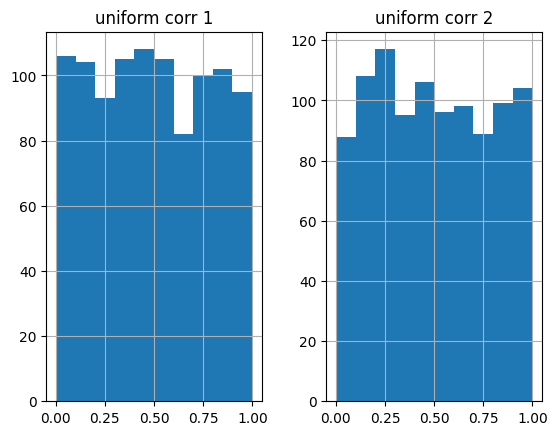

In [ ]:
# generate two uniformly distributed features that are correlated with the target
# gen_correlated_uniform_series(original_series, correlation_coefficient=0, size=len(df))
df['uniform corr 1'] = gen_correlated_uniform_series(df['target'])
df['uniform corr 2'] = gen_correlated_uniform_series(df['target'])

print(df[['uniform corr 1', 'uniform corr 2', 'target']].corr())
df[['uniform corr 1', 'uniform corr 2']].hist();

In [ ]:
# create two features that are duplicates of other features
df['duplicate_1'] = df['informative_1']
df['duplicate_2'] = df['informative_2']

In [ ]:
# create two numerical features with outliers
df['outliers 1'] = gen_outliers(mean=0, std_dev=1, size=len(df), outlier_percentage=0.1, outlier_magnitude=3)
df['outliers 2'] = gen_outliers(mean=3, std_dev=2, size=len(df), outlier_percentage=0.2, outlier_magnitude=2)

In [ ]:
# create a numerical feature that needs standard scaling
df['standard scaling'] = gen_standard_scaling()

In [ ]:
# create a numerical feature that needs min max scaling
df['min max scaling'] = gen_minmax_scaling()

In [ ]:
# generate null values
for col in df.drop(['class', 'informative_1', 'informative_2', 'target', 'duplicate_1', 'duplicate_2'], axis=1).columns:
    df[col] = gen_null(df[col], np.random.choice([0, 5, 10, 20, 30, 50], size=1).item())

In [ ]:
# create two features that have constant values
df['constant_1'] = 'constant_value'
df['constant_2'] = 'constant_value'

In [ ]:
# create two features with semi constant values
df['semi_constant_1'] = gen_quasi_constants('q_const', variation_percentage = 1)
df['semi_constant_2'] = gen_quasi_constants('q_const', variation_percentage = 1)

In [ ]:
print(df.info())  # check your work

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   binary                 1000 non-null   object  
 1   given_name             700 non-null    object  
 2   surname                700 non-null    object  
 3   date_of_birth          800 non-null    object  
 4   phone_number           500 non-null    object  
 5   email                  800 non-null    object  
 6   address                631 non-null    object  
 7   city                   623 non-null    object  
 8   state                  806 non-null    object  
 9   zipcode                626 non-null    object  
 10  informative_1          1000 non-null   float64 
 11  informative_2          1000 non-null   float64 
 12  target                 1000 non-null   float64 
 13  class                  1000 non-null   int64   
 14  corr_feature_class     700 non-null    fl

In [ ]:
# add duplicates
dupes = df.loc[0:9]
df = pd.concat([df, dupes], axis=0)

# shuffle all columns
# df = df.sample(frac=1).reset_index(drop=True)
# df = df.sample(frac=1, axis=1)

# shuffle selected columns
demographic_columns = demographics.columns
remaining_columns = [col for col in df.columns if col not in demographic_columns]
# print(remaining_columns)
np.random.shuffle(remaining_columns)

# Reassemble the DataFrame with the shuffled columns
df = df[list(demographic_columns) + list(remaining_columns)]

# move target to the end of the list
class_var = 'class'
df = df[df.drop('class', axis=1).columns.tolist() + [class_var]]

print(df.shape)
print(df.info())
df.head()

(1010, 41)
<class 'pandas.core.frame.DataFrame'>
Index: 1010 entries, 0 to 9
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   binary                 1010 non-null   object  
 1   given_name             707 non-null    object  
 2   surname                705 non-null    object  
 3   date_of_birth          807 non-null    object  
 4   phone_number           507 non-null    object  
 5   email                  808 non-null    object  
 6   address                637 non-null    object  
 7   city                   628 non-null    object  
 8   state                  814 non-null    object  
 9   zipcode                630 non-null    object  
 10  correlated w target 2  808 non-null    float64 
 11  standard scaling       1010 non-null   float64 
 12  pd qcut2               807 non-null    category
 13  uniform corr 1         706 non-null    float64 
 14  informative_1          1010 non-null 

,binary,given_name,surname,date_of_birth,phone_number,email,address,city,state,zipcode,...,pd qcut3,random label num 4,duplicate_1,random choice 2,duplicate_2,random choice 7,outliers 2,random choice 4,multicollinearity 3,class
0,binary_2,NaN,Landry,1989-05-28,279.391.8227,rachelgonzalez@example.net,NaN,NaN,NaN,NaN,...,NaN,label num lo 4,-0.999102,Rand Choice 1,-0.663860,Monday,2.991296,South,1.483556,1
1,binary_2,Spencer,Robertson,NaN,001-576-734-9772x71766,sylvia13@example.com,659 Fitzpatrick Keys Suite 024,Port Cynthia,MP,NaN,...,NaN,label num lo 2,1.246686,Rand Choice 2,1.153597,Monday,1.115868,West,2.472647,1
2,binary_1,NaN,NaN,NaN,+1-204-665-5879x9860,jeanne31@example.net,31799 Stephen Flats,Fostershire,NJ,NaN,...,G5,label num lo 3,0.962777,Rand Choice 1,0.859397,NaN,4.863430,West,0.548869,1
3,binary_1,Lauren,NaN,2008-06-27,8528925338,hartmichael@example.net,NaN,NaN,NaN,NaN,...,G6,label num lo 2,-2.957441,Rand Choice 1,2.033645,Sunday,3.131133,North,NaN,1
4,binary_1,Toni,NaN,1920-12-21,NaN,thompsonlisa@example.com,1094 Rowland Cove Apt. 700,Brownmouth,DE,54543,...,G5,NaN,1.141165,Rand Choice 1,1.059449,Wednesday,-0.016231,South,-0.310186,1


In [ ]:
df.to_csv('.../created_raw_data.csv', index=False)

# Part 2 - Exploratory Data Analysis (EDA)

Exploratory data analysis (EDA) is a data analysis method that helps data scientists understand their data and identify patterns. It's often used as the first step in data analysis.

## Load Data

In [ ]:
import pandas as pd

df = pd.read_csv('.../created_raw_data.csv')
print(df.shape)
print(df.info())
df.head()

## Var Types

In [ ]:
df_numerical = df.select_dtypes(include='number').columns
df_object = df.select_dtypes(include=['object']).columns
df_discreet = df.select_dtypes(include=['category']).columns
df_categorical_features = df.select_dtypes(include=['category', 'object']).columns
df_discreet

Index(['pd qcut2', 'pd qcut1', 'pd qcut3'], dtype='object')

In [ ]:
import numpy as np
import pickle

df_numerical = df.select_dtypes(exclude=['category', 'object']).columns.to_list()
df_object = df.select_dtypes(include=['object']).columns.to_list()
df_discreet = df.select_dtypes(include=['category']).columns.to_list()
df_categorical_features = df.select_dtypes(include=['category', 'object']).columns.to_list()

# Create a variable to pickle
data = {'df_numerical': df_numerical, 'df_object': df_object, 'df_discreet': df_discreet, 'df_categorical_features': df_categorical_features}

# Pickle the variable and save it to a file
with open('.../var_types.pkl', 'wb') as f:
    pickle.dump(data, f)


## Correlation

In [ ]:
# code along
df._get_numeric_data().corr().round(2)

,correlated w target 2,standard scaling,uniform corr 1,informative_1,outliers 1,correlated w target 1,min max scaling,target,multicollinearity 4,multicollinearity 2,multicollinearity 1,informative_2,corr_feature_class,uniform corr 2,duplicate_1,duplicate_2,outliers 2,multicollinearity 3,class
correlated w target 2,1.00,0.02,0.44,-0.02,0.02,0.40,0.01,0.69,0.04,0.00,-0.01,0.68,0.20,0.47,-0.02,0.68,-0.02,0.03,0.50
standard scaling,0.02,1.00,-0.01,0.04,0.00,0.02,-0.02,0.00,0.07,-0.03,-0.03,0.01,-0.06,0.02,0.04,0.01,-0.04,0.05,-0.04
uniform corr 1,0.44,-0.01,1.00,-0.07,-0.08,0.34,-0.05,0.69,-0.02,0.01,0.04,0.68,0.16,0.52,-0.07,0.68,-0.05,-0.03,0.54
informative_1,-0.02,0.04,-0.07,1.00,0.00,-0.02,0.03,-0.03,-0.04,-0.01,0.00,0.10,-0.02,-0.03,1.00,0.10,-0.03,0.00,-0.01
outliers 1,0.02,0.00,-0.08,0.00,1.00,0.03,0.01,-0.04,-0.02,-0.06,-0.07,-0.04,-0.03,-0.01,0.00,-0.04,-0.02,0.01,-0.04
correlated w target 1,0.40,0.02,0.34,-0.02,0.03,1.00,-0.05,0.53,-0.01,0.02,0.00,0.53,0.16,0.32,-0.02,0.53,0.02,-0.02,0.38
min max scaling,0.01,-0.02,-0.05,0.03,0.01,-0.05,1.00,-0.01,0.01,-0.02,-0.03,-0.01,0.04,-0.02,0.03,-0.01,-0.02,0.04,0.01
target,0.69,0.00,0.69,-0.03,-0.04,0.53,-0.01,1.00,0.03,0.02,0.02,0.99,0.28,0.70,-0.03,0.99,0.01,0.03,0.72
multicollinearity 4,0.04,0.07,-0.02,-0.04,-0.02,-0.01,0.01,0.03,1.00,0.04,-0.03,0.02,-0.04,0.03,-0.04,0.02,0.04,0.90,-0.01
multicollinearity 2,0.00,-0.03,0.01,-0.01,-0.06,0.02,-0.02,0.02,0.04,1.00,0.66,0.02,0.00,-0.01,-0.01,0.02,-0.01,0.03,-0.01


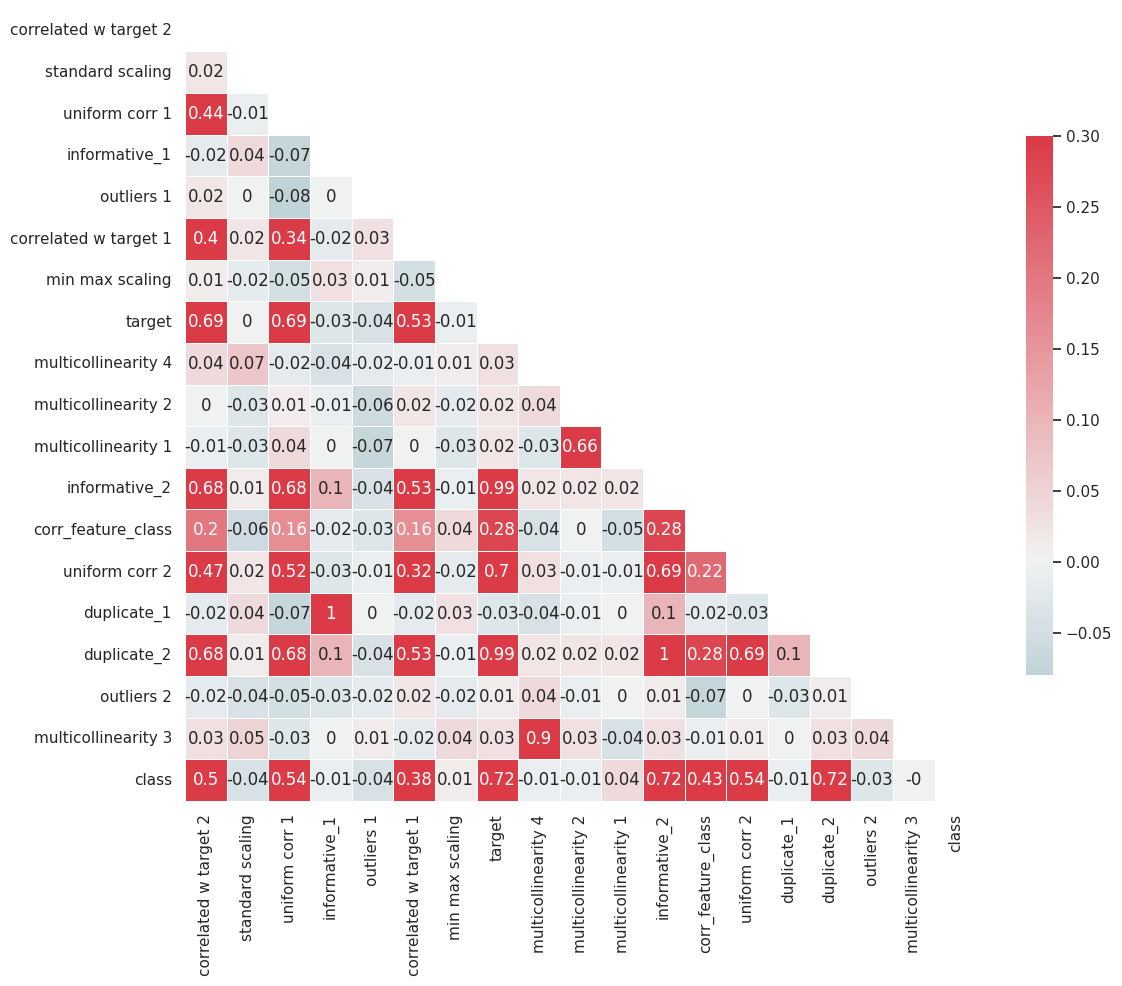

In [ ]:
# show correlation between the features
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# correlation matrix
sns.set(style="white")

# compute the correlation matrix
corr = df._get_numeric_data().corr().round(2)

# generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# set up the matplotlib figure
# f, ax = plt.subplots()
f = plt.figure(figsize=(12, 12))

# generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True);

plt.tight_layout()

In [ ]:
import pickle

# calculate the correlation matrix
corr_matrix = df._get_numeric_data().corr()

# Create a mask for the upper triangle (to avoid duplicates)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Convert the correlation matrix to a long format
corr_df = corr_matrix.stack().reset_index()
corr_df.columns = ['feature1', 'feature2', 'correlation']

# Filter for correlations above a certain threshold (e.g., 0.7)
high_corr_df = corr_df[(abs(corr_df['correlation']) > 0.7) & (corr_df['feature1'] != corr_df['feature2'])]

# Sort by absolute correlation in descending order
high_corr_df = high_corr_df.sort_values(by='correlation', ascending=False, key=abs)

# Print the top correlated features
# print(high_corr_df['feature1'].to_list()[4:10])
print(high_corr_df)

# Create a variable to pickle
data = {'correlation scores': high_corr_df}

# Pickle the variable and save it to a file
with open('.../correlation_scores.pkl', 'wb') as f:
    pickle.dump(data, f)

                feature1             feature2  correlation
71         informative_1          duplicate_1     1.000000
224        informative_2          duplicate_2     1.000000
269          duplicate_1        informative_1     1.000000
296          duplicate_2        informative_2     1.000000
144               target        informative_2     0.991500
148               target          duplicate_2     0.991500
216        informative_2               target     0.991500
292          duplicate_2               target     0.991500
169  multicollinearity 4  multicollinearity 3     0.904962
331  multicollinearity 3  multicollinearity 4     0.904962
151               target                class     0.722662
349                class               target     0.722662
227        informative_2                class     0.717481
303          duplicate_2                class     0.717481
353                class        informative_2     0.717481
357                class          duplicate_2     0.7174

In [ ]:
# check for vif
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

# handle null values (using mean imputation for simplicity)
x_copy = df.drop('class', axis=1)._get_numeric_data()
x_copy.fillna(x_copy.mean(), inplace=True)

print(max([variance_inflation_factor(x_copy, i) for i in range(x_copy.shape[1])]))

# calculate VIF
vif = pd.DataFrame()
vif["Variable"] = x_copy.columns
vif["VIF"] = [variance_inflation_factor(x_copy, i) for i in range(x_copy.shape[1])]
print(vif)

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


inf
                 Variable           VIF
0   correlated w target 2  1.619675e+00
1        standard scaling  1.012457e+00
2          uniform corr 1  1.520865e+00
3           informative_1           inf
4              outliers 1  1.016685e+00
5   correlated w target 1  1.416212e+00
6         min max scaling  1.009409e+00
7                  target  1.168994e+04
8     multicollinearity 4  2.283353e+00
9     multicollinearity 2  1.430171e+00
10    multicollinearity 1  1.431819e+00
11          informative_2           inf
12     corr_feature_class  1.072633e+00
13         uniform corr 2  1.329686e+00
14            duplicate_1           inf
15            duplicate_2           inf
16             outliers 2  1.014183e+00
17    multicollinearity 3  2.280042e+00


## Multicollinearity

* We want high correlation with target
* We don't want high correlation between features
* Drop correlated features
* Combine correlated features

In [ ]:
# iterate dropping features with high vif
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

removed1=[]
x_copy1 = x_copy.copy()
max_vif = thresh = 10
while max_vif >= thresh:
  my_list = [variance_inflation_factor(x_copy1, i) for i in range(x_copy1.shape[1])]
  max_vif = max(my_list)
  if max_vif > thresh:
    max_index = my_list.index(max_vif)
    removed1.append(x_copy1.columns[max_index])
    print(x_copy1.columns[max_index], variance_inflation_factor(x_copy1, max_index))
    x_copy1.drop(x_copy1.columns[max_index], axis=1, inplace=True)


# Calculate VIF
vif = pd.DataFrame()
vif["Variable"] = x_copy1.columns
vif["VIF"] = [variance_inflation_factor(x_copy1, i) for i in range(x_copy1.shape[1])]
print(vif)

# Create a variable to pickle
data = {'vif': vif}

# Pickle the variable and save it to a file
with open('.../vif.pkl', 'wb') as f:
    pickle.dump(data, f)

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


informative_1 inf
informative_2 inf


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


target 11689.943495054538
standard scaling 14.985640308984271
                 Variable       VIF
0   correlated w target 2  1.621038
1          uniform corr 1  6.464857
2              outliers 1  1.017558
3   correlated w target 1  1.412749
4         min max scaling  9.424784
5     multicollinearity 4  2.293390
6     multicollinearity 2  1.434687
7     multicollinearity 1  1.431587
8      corr_feature_class  1.660966
9          uniform corr 2  7.096115
10            duplicate_1  1.057868
11            duplicate_2  2.547101
12             outliers 2  2.583981
13    multicollinearity 3  2.284534


In [ ]:
# check again vif
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

removed2=[]
max_vif = thresh = 10
while max_vif >= thresh:
  max_vif = max([variance_inflation_factor(x_copy, i) for i in range(x_copy.shape[1])])
  for i in range(x_copy.shape[1]):
    if variance_inflation_factor(x_copy, i) > thresh:
      removed2.append(x_copy.columns[i])
      print(x_copy.columns[i], variance_inflation_factor(x_copy, i))
      x_copy.drop(x_copy.columns[i], axis=1, inplace=True)
      break

# Calculate VIF
vif = pd.DataFrame()
vif["Variable"] = x_copy.columns
vif["VIF"] = [variance_inflation_factor(x_copy, i) for i in range(x_copy.shape[1])]
print(vif)

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


informative_1 inf
target 11689.943495054538


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


standard scaling 14.985640308984271


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


informative_2 inf
                 Variable       VIF
0   correlated w target 2  1.621038
1          uniform corr 1  6.464857
2              outliers 1  1.017558
3   correlated w target 1  1.412749
4         min max scaling  9.424784
5     multicollinearity 4  2.293390
6     multicollinearity 2  1.434687
7     multicollinearity 1  1.431587
8      corr_feature_class  1.660966
9          uniform corr 2  7.096115
10            duplicate_1  1.057868
11            duplicate_2  2.547101
12             outliers 2  2.583981
13    multicollinearity 3  2.284534


In [ ]:
print(removed1)
print(removed2)

['informative_1', 'informative_2', 'target', 'standard scaling']
['informative_1', 'target', 'standard scaling', 'informative_2']


## Outliers

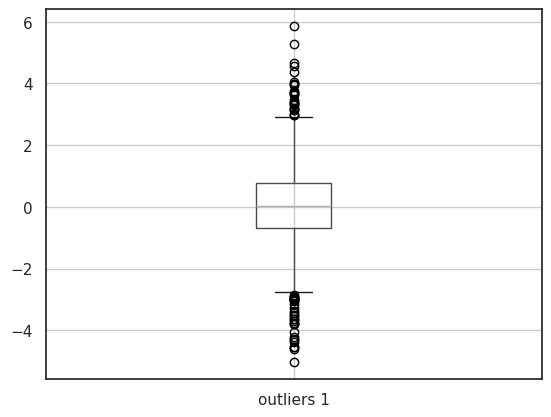

In [ ]:
# code along
df.boxplot(column=['outliers 1']);

In [ ]:
# code along
df.describe()

,correlated w target 2,standard scaling,uniform corr 1,informative_1,outliers 1,correlated w target 1,min max scaling,target,multicollinearity 4,multicollinearity 2,multicollinearity 1,informative_2,corr_feature_class,uniform corr 2,duplicate_1,duplicate_2,outliers 2,multicollinearity 3,class
count,808.000000,1010.000000,706.000000,1010.000000,907.000000,1010.000000,909.000000,1010.000000,807.000000,960.000000,705.000000,1010.000000,707.000000,505.000000,1010.000000,1010.000000,1010.000000,908.000000,1010.000000
mean,0.095813,49976.747513,0.494449,-0.047372,0.049798,0.174808,422.422403,0.195609,-0.066657,-0.055818,0.011434,-0.018978,2.055578,0.489747,-0.047372,-0.018978,2.895015,-0.046892,0.502970
std,2.955398,10208.332456,0.288302,1.324010,1.346687,2.978709,100.182792,2.991347,1.007869,0.970038,1.001267,1.403413,3.233617,0.295246,1.324010,1.403413,2.196185,1.023693,0.500239
min,-8.161661,8175.893046,0.003231,-3.836929,-5.030864,-10.241793,9.271920,-8.943212,-2.954008,-3.088686,-2.809906,-4.543441,-12.790567,0.001699,-3.836929,-4.543441,-3.794006,-3.263191,0.000000
25%,-1.930904,43459.789290,0.244874,-1.018399,-0.680592,-1.941877,356.324631,-2.166961,-0.741500,-0.708669,-0.647445,-1.050339,0.177714,0.217855,-1.018399,-1.050339,1.407231,-0.701439,0.000000
50%,0.102482,49740.181469,0.484182,-0.224366,0.016721,0.120585,424.239276,-0.011259,-0.090804,-0.089010,-0.034434,-0.194004,2.001172,0.475996,-0.224366,-0.194004,2.932398,-0.001473,1.000000
75%,2.173246,57013.783873,0.745422,0.975364,0.759216,2.247761,488.055011,2.367192,0.642672,0.559828,0.656427,0.991017,3.800447,0.739002,0.975364,0.991017,4.281866,0.602101,1.000000
max,10.426718,85289.199605,0.998136,3.994644,5.863531,10.552818,723.573055,9.299296,3.267778,3.129346,2.993883,4.020262,18.965600,0.999146,3.994644,4.020262,10.657751,2.905544,1.000000


In [ ]:


# Create a variable to pickle
data = {'outliers': outliers}

# Pickle the variable and save it to a file
with open('.../outliers.pkl', 'wb') as f:
    pickle.dump(data, f)

In [ ]:
# code along
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1010 entries, 0 to 9
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   binary                 1010 non-null   object  
 1   given_name             707 non-null    object  
 2   surname                705 non-null    object  
 3   date_of_birth          807 non-null    object  
 4   phone_number           507 non-null    object  
 5   email                  808 non-null    object  
 6   address                637 non-null    object  
 7   city                   628 non-null    object  
 8   state                  814 non-null    object  
 9   zipcode                630 non-null    object  
 10  correlated w target 2  808 non-null    float64 
 11  standard scaling       1010 non-null   float64 
 12  pd qcut2               807 non-null    category
 13  uniform corr 1         706 non-null    float64 
 14  informative_1          1010 non-null   float64 


# Part 3 - Data Prep

https://www.udemy.com/course/feature-engineering-for-machine-learning

* Types and characteristics of data
* Missing data imputation
* Categorical encoding
* Variable transformation
* Discretization
* Outliers
* Datetime
* Scaling
* Feature creation

## Load Data

In [ ]:
import pandas as pd

df = pd.read_csv('.../created_raw_data.csv')
print(df.shape)
print(df.info())
df.head()

In [ ]:
import preppy.utils as utils
from preppy.version import __version__

print(__version__)

utils.report.write_report(df, thresh=.5)

PrepPy Version: 0.1.0
REPORT FOR DATA PREP

#################################################
Columns with Constant Values
#################################################
['constant_2', 'constant_1']

#################################################
Columns with Quasi-Constant Values
#################################################
['binary', 'class', 'constant_1', 'constant_2', 'pd qcut1', 'random choice 2']

#################################################
Duplicate Rows
#################################################
20

#################################################
Duplicate Columns
#################################################
['duplicate_1', 'constant_1', 'duplicate_2']

#################################################
Variables with Noticeably Higher Scales
#################################################
Features with Noticeably Higher Scales (Based on Standard Deviation):
standard scaling    10208.332456
Name: std, dtype: float64

Features with Noticeably High

In [ ]:
import preppy.utils as preppy

consts = preppy.functions.identify_consts(df)
quasi_consts = preppy.functions.identify_quasi_consts(df)
duplicates = preppy.functions.check_col_duplicates(df)
print(duplicates)
print(consts)
print(quasi_consts)

['duplicate_1', 'constant_1', 'duplicate_2']
['constant_2', 'constant_1']
['constant_1', 'constant_2']


In [ ]:
# numeric_df = df.apply(pd.to_numeric, errors='coerce')
all_deletes = list(set(consts + quasi_consts + duplicates))
for col in all_deletes:
  print(col, df[col].dtype)
  if df[col].dtype in ['float64', 'int64']:
    df_numerical.remove(col)
  elif df[col].dtype in ['object']:
    df_object.remove(col)
    df_categorical_features.remove(col)
  else:
    df_discreet.remove(col)


duplicate_2 float64
duplicate_1 float64
constant_2 object
constant_1 object


## PrepPy Pipeline

In [ ]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
import preppy.utils as preppy

pipe = [
    ('constants', preppy.classes.RemoveConstants()),
    ('quasiconsts', preppy.classes.RemoveQuasiConstants(thresh=0.8)),
    ('duplicates', preppy.classes.DropDuplicates()),
    ('missing', preppy.classes.HandleMissingValues()),
    # ('encoding', HandleCatEncodeing())
]

pipe_model = Pipeline(pipe)
data = pipe_model.fit_transform(df)
cols = [col for col in df.columns if col not in consts + quasi_consts + duplicates]
nu_df = pd.DataFrame(data, columns=cols)
nu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   binary                 1000 non-null   object
 1   given_name             1000 non-null   object
 2   surname                1000 non-null   object
 3   date_of_birth          1000 non-null   object
 4   phone_number           1000 non-null   object
 5   email                  1000 non-null   object
 6   address                1000 non-null   object
 7   city                   1000 non-null   object
 8   state                  1000 non-null   object
 9   zipcode                1000 non-null   object
 10  correlated w target 2  1000 non-null   object
 11  standard scaling       1000 non-null   object
 12  pd qcut2               1000 non-null   object
 13  uniform corr 1         1000 non-null   object
 14  informative_1          1000 non-null   object
 15  semi_constant_2       

/content/preppy/utils/functions.py:61: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dfx[feat] = df[feat].fillna(df[feat].mode()[0])


In [ ]:
import pickle

# Load the pickled variable from the file
with open('.../var_types.pkl', 'rb') as f:
    var_types = pickle.load(f)

print(var_types)

{'df_numerical': ['correlated w target 2', 'standard scaling', 'uniform corr 1', 'informative_1', 'outliers 1', 'correlated w target 1', 'min max scaling', 'target', 'multicollinearity 4', 'multicollinearity 2', 'multicollinearity 1', 'informative_2', 'corr_feature_class', 'uniform corr 2', 'outliers 2', 'multicollinearity 3', 'class'], 'df_object': ['binary', 'given_name', 'surname', 'date_of_birth', 'phone_number', 'email', 'address', 'city', 'state', 'zipcode', 'semi_constant_2', 'semi_constant_1', 'random label num 12', 'random label num 4', 'random choice 2', 'random choice 7', 'random choice 4'], 'df_discreet': ['pd qcut2', 'pd qcut1', 'pd qcut3'], 'df_categorical_features': ['binary', 'given_name', 'surname', 'date_of_birth', 'phone_number', 'email', 'address', 'city', 'state', 'zipcode', 'pd qcut2', 'semi_constant_2', 'pd qcut1', 'semi_constant_1', 'random label num 12', 'pd qcut3', 'random label num 4', 'random choice 2', 'random choice 7', 'random choice 4']}


In [ ]:
df_numerical = var_types['df_numerical']
df_object = var_types['df_object']
df_discreet = var_types['df_discreet']
df_categorical_features = var_types['df_categorical_features']

In [ ]:
# code along
nu_df[df_numerical] = nu_df[df_numerical].astype(float)
nu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   binary                 1000 non-null   object 
 1   given_name             1000 non-null   object 
 2   surname                1000 non-null   object 
 3   date_of_birth          1000 non-null   object 
 4   phone_number           1000 non-null   object 
 5   email                  1000 non-null   object 
 6   address                1000 non-null   object 
 7   city                   1000 non-null   object 
 8   state                  1000 non-null   object 
 9   zipcode                1000 non-null   object 
 10  correlated w target 2  1000 non-null   float64
 11  standard scaling       1000 non-null   float64
 12  pd qcut2               1000 non-null   object 
 13  uniform corr 1         1000 non-null   float64
 14  informative_1          1000 non-null   float64
 15  semi_

## Feature Engineering

### Feature Combination

In [ ]:
# create a new variable by combining two variables
df['scaling_combined'] = df['standard scaling'] + df['min max scaling']
df.drop(['standard scaling', 'min max scaling'], axis=1, inplace=True)

### Categorical Encoding

In [ ]:
# code along
import preppy.utils as utils

df = utils.functions.do_OHE(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 45 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   binary                             1000 non-null   int64  
 1   given_name                         1000 non-null   float64
 2   surname                            1000 non-null   float64
 3   date_of_birth                      1000 non-null   float64
 4   phone_number                       1000 non-null   float64
 5   email                              1000 non-null   float64
 6   address                            1000 non-null   float64
 7   city                               1000 non-null   float64
 8   state                              1000 non-null   float64
 9   zipcode                            1000 non-null   float64
 10  correlated w target 2              1000 non-null   float64
 11  standard scaling                   1000 non-null   float6

In [ ]:
df.to_csv('.../prepared_data.csv', index=False)

# Part 4 - Feature Selection

In [ ]:
# get data
import pandas as pd

# df = pd.read_csv('.../prepared_data.csv')
df = pd.read_csv('/content/drive/MyDrive/Project CICD/make_me_data_science_v.csv')
print(df.shape)
print(df.info())
df.head()

(1000, 45)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 45 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   binary                             1000 non-null   int64  
 1   given_name                         1000 non-null   float64
 2   surname                            1000 non-null   float64
 3   date_of_birth                      1000 non-null   float64
 4   phone_number                       1000 non-null   float64
 5   email                              1000 non-null   float64
 6   address                            1000 non-null   float64
 7   city                               1000 non-null   float64
 8   state                              1000 non-null   float64
 9   zipcode                            1000 non-null   float64
 10  correlated w target 2              1000 non-null   float64
 11  standard scaling                   1000 non-nu

,binary,given_name,surname,date_of_birth,phone_number,email,address,city,state,zipcode,...,semi_constant_2_q_const_0_1,semi_constant_2_q_const_0_2,semi_constant_1_q_const_0_1,semi_constant_1_q_const_0_2,random label num 4_label num lo 2,random label num 4_label num lo 3,random label num 4_label num lo 4,random choice 4_North,random choice 4_South,random choice 4_West
0,1,0.316,0.001,0.001,0.001,0.001,0.370,0.379,0.220,0.376,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1,0.001,0.001,0.202,0.001,0.001,0.001,0.001,0.014,0.376,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0,0.316,0.320,0.202,0.001,0.001,0.001,0.001,0.024,0.376,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0,0.003,0.320,0.001,0.001,0.001,0.370,0.379,0.220,0.376,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0,0.001,0.320,0.001,0.501,0.001,0.001,0.001,0.017,0.001,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


## Train Test Split

In [ ]:
# seed
import random

seed_id = 123456789
random_state = random.seed(seed_id)
random_state

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop('class', axis=1), df['class'], test_size=0.3, random_state=random_state)
X_train.shape, X_test.shape

((700, 44), (300, 44))

### Mutual Information

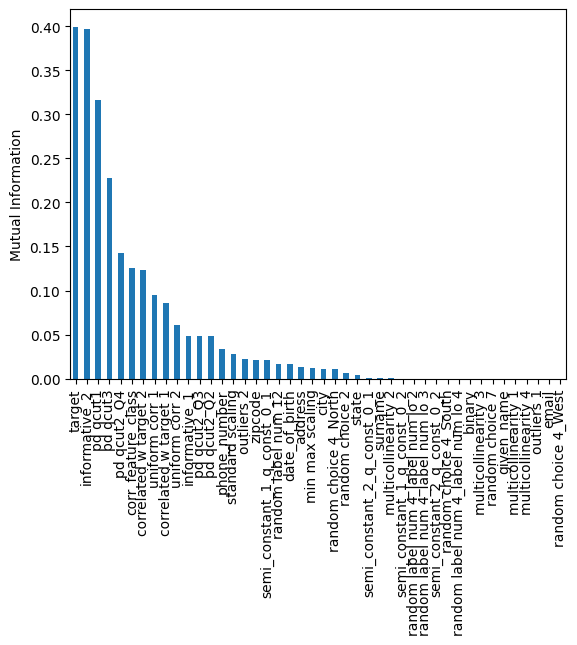

In [ ]:
# mutual information
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression, mutual_info_classif

mi = mutual_info_classif(X_train, y_train)
mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=False).plot.bar()
plt.ylabel('Mutual Information');

In [ ]:
mi_keepers = mi.sort_values(ascending=False).index[:5]
print(mi_keepers)

Index(['target', 'informative_2', 'pd qcut1', 'pd qcut3', 'pd qcut2_Q4'], dtype='object')


### SelectKBest

In [ ]:
# SelectKBest
from sklearn.feature_selection import SelectKBest, f_regression, f_classif

selector = SelectKBest(f_classif, k=5) # Select the top 5 features
X_new = selector.fit(X_train, y_train)

kb_keepers = X_train.columns.values[selector.get_support()]
print(kb_keepers)

['correlated w target 1' 'target' 'pd qcut1' 'informative_2' 'pd qcut2_Q4']


### Select From Model

In [ ]:
# Select from model
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_scaled = scaler.transform(X_train)

selections = SelectFromModel(estimator=LogisticRegression()).fit(X_scaled, y_train)
mt_keepers = X_train.columns.values[selections.get_support()]
print(mt_keepers)

['address' 'outliers 1' 'correlated w target 1' 'target' 'informative_2'
 'corr_feature_class' 'random label num 12' 'semi_constant_2_q_const_0_2'
 'random label num 4_label num lo 2' 'random label num 4_label num lo 3'
 'random choice 4_South']


### Recursive Feature Elmination

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, LogisticRegression

estimator = LogisticRegression()
selector = RFE(estimator, n_features_to_select=5) # Select the top 5 features
X_new = selector.fit_transform(X_scaled, y_train)
rf_keepers = X_train.columns.values[selections.get_support()]
print(rf_keepers)

['address' 'outliers 1' 'correlated w target 1' 'target' 'informative_2'
 'corr_feature_class' 'random label num 12' 'semi_constant_2_q_const_0_2'
 'random label num 4_label num lo 2' 'random label num 4_label num lo 3'
 'random choice 4_South']


### Review Pickled Variables

* Correlated features
* VIF
* Outliers

### Random Forest Importance


In [ ]:
# random forest importance
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

selects = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=random_state), max_features=4)
selects.fit(X_train, y_train)
rfi = X_train.columns[(selects.get_support())]
rfi.tolist()

['informative_1', 'target', 'pd qcut1', 'informative_2']

Scenario: We are trying to classify if a user will subscribe to our YouTube channel.

Lets grab the first four features from feature importance and rename them using the following suggestions:

**Numerical Features**

*   **Watch Time (seconds)**: Measures the total time viewers spend watching your videos.
*   **Average View Duration (seconds)**: The average length of time viewers watch a single video.
*   **Click-Through Rate (CTR)**: The percentage of viewers who click on your video after seeing the thumbnail/title.
*   **Comments per Video**: The number of comments on each video.
*   **Shares per Video**: The number of times each video is shared.
*   **Likes per Video**: The number of likes on each video.
*   **Dislikes per Video**: The number of dislikes on each video.
*   **Subscribers Gained per Video**: The number of subscribers gained after a video is published.
*   **Views per Video**: The total number of views for each video.

**Categorical Features**

*   **Video Category**: The category or genre of the video (e.g., tutorial, review, vlog).
*   **Upload Frequency**: How often you upload videos (e.g., daily, weekly, monthly).
*   **Video Length**: Categorize videos based on length (e.g., short, medium, long).
*   **Thumbnail Type**: The type of thumbnail used (e.g., image, text overlay, face).
*   **Use of Background Music**: Whether the video uses background music or not.
*   **Use of End Screens**: Whether the video includes end screens or not.
*   **Viewer Gender**: The dominant gender of your viewers (if available).
*   **Viewer Age**: The dominant age group of your viewers (if available).
*   **Viewer Location**: The primary location of your viewers (if available).

**Discrete Features**

*   **Number of Videos Uploaded**: The total number of videos on your channel.
*   **Channel Age (months)**: The age of your YouTube channel.
*   **Number of Playlists**: The total number of playlists on your channel.
*   **Use of Subtitles**: Whether your videos include subtitles (0 or 1).
*   **Use of Closed Captions**: Whether your videos include closed captions (0 or 1).
*   **Viewer Engagement Level**: Categorize viewer engagement into levels (e.g., low, medium, high).
*   **Video Quality**: Categorize video quality (e.g., low, medium, high).
*   **Subscriber Count**: The total number of subscribers to your channel.





In [ ]:
features_to_model = rfi
X_train[features_to_model].head()

,informative_1,target,pd qcut1,informative_2
330,-0.384649,2.292329,1,0.913557
769,-0.144920,0.273163,1,0.003777
174,-1.607711,4.059409,1,1.569953
684,0.576484,1.293910,1,0.579951
466,-2.443652,5.528643,1,2.140680


In [ ]:
new_column_names = {rfi[0]: 'watch_time', rfi[1]: 'avg_view_duration', rfi[2]: 'click_through_rate', rfi[3]: 'interest'}
X_train.rename(columns=new_column_names, inplace=True)
X_test.rename(columns=new_column_names, inplace=True)
features_to_model = list(new_column_names.values())
X_train = X_train[features_to_model]
X_test = X_test[features_to_model]

In [ ]:
import pickle

# Save the data
with open('.../train_test_split.pkl', 'wb') as f:
    pickle.dump([X_train, X_test, y_train, y_test], f)

In [ ]:
import shutil

# Source file path (within your Drive)
source_file = 'train_test_split.pkl'

# Destination path (root of your Drive)
destination_path = '/content/drive/MyDrive/Colab Notebooks/train_test_split.pkl'

# Copy the file
shutil.copy(source_file, destination_path)

'/content/drive/MyDrive/Colab Notebooks/train_test_split.pkl'

# Part 5 - Data Modeling

## Get Data

In [ ]:
# seed
import random

seed_id = 123456789
random_state = random.seed(seed_id)
random_state

In [ ]:
import shutil

# Source file path (within your Drive)
source_file = '/content/drive/MyDrive/Colab Notebooks/train_test_split.pkl'

# Destination path (root of your Drive)
destination_path = 'train_test_split.pkl'

# Copy the file
shutil.copy(source_file, destination_path)

'train_test_split.pkl'

In [ ]:
import pickle

# Load the data
with open('.../train_test_split.pkl', 'rb') as f:
    X_train, X_test, y_train, y_test = pickle.load(f)

## Logistic Regression

In [ ]:
# model, predict, evaluate, and plot
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

model = LogisticRegression(solver='liblinear', random_state=random_state)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))

[[124  24]
 [ 26 126]]
0.8333333333333334


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=random_state)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))

[[137  11]
 [ 16 136]]
0.91


## Model Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
print('accuracy:', accuracy_score(predictions, y_test))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

accuracy: 0.91
[[137  11]
 [ 16 136]]
              precision    recall  f1-score   support

         0.0       0.90      0.93      0.91       148
         1.0       0.93      0.89      0.91       152

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



## Model Fine-Tuning

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

hyperparameters = {'max_depth': [2, 3],
              'min_samples_split': [4, 5],
              'min_samples_leaf': [4, 5],
              'bootstrap': [True, False],
              'criterion': ['entropy', 'gini']}

grid_search = GridSearchCV(estimator = RandomForestClassifier(),
                           param_grid = hyperparameters,
                           scoring = 'accuracy',
                           cv = 10)

grid_search = grid_search.fit(X_train, y_train)

best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print('best accuracy', best_accuracy)
print('best parameters', best_parameters)

best accuracy 0.8928571428571429
best parameters {'bootstrap': True, 'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 4}


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


## Final Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model = RandomForestClassifier(random_state=random_state).set_params(**best_parameters) # * args, ** kwargs
model.fit(X_train.values, y_train)
predictions = model.predict(X_test.values)
print('accuracy:', accuracy_score(predictions, y_test))

accuracy: 0.8766666666666667


## Confusion Matrix

In [ ]:
print(confusion_matrix(y_test, predictions))

[[130  18]
 [ 19 133]]


## Precision Recall

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.87      0.88      0.88       148
         1.0       0.88      0.88      0.88       152

    accuracy                           0.88       300
   macro avg       0.88      0.88      0.88       300
weighted avg       0.88      0.88      0.88       300



## Bias Variance

In [ ]:
from mlxtend.evaluate import bias_variance_decomp

avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
    model,
    X_train.values, # Convert X_train to NumPy array
    y_train.values, # Convert y_train to NumPy array
    X_test.values, # Convert X_test to NumPy array
    y_test.values, # Convert y_test to NumPy array
    loss='0-1_loss',
    random_seed=random_state)

print('Average expected loss: %.3f' % avg_expected_loss)
print('Average bias: %.3f' % avg_bias)
print('Average variance: %.3f' % avg_var)

# Average expected loss: 0.087
# Average bias: 0.080
# Average variance: 0.034

Average expected loss: 0.136
Average bias: 0.123
Average variance: 0.027


In [ ]:
X_test.head()

,watch_time,avg_view_duration,click_through_rate,interest
471,0.427282,1.632776,1,0.717601
899,0.309967,3.105226,1,1.388979
301,-0.918215,1.632276,1,0.531726
176,2.389713,3.967354,1,2.078499
12,-0.686077,-0.040396,0,-0.217304


In [ ]:
import pandas as pd

sample_to_predict = pd.Series({"watch_time": -8.1, "avg_view_duration": 1.4, "click_through_rate": -0.7, "interest": 0})
sample_to_predict = pd.DataFrame([sample_to_predict])
model.predict_proba(sample_to_predict.values)

array([[0.32532761, 0.67467239]])

In [ ]:
import pickle

with open('.../model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [ ]:
import shutil

# Source file path (within your Drive)
source_file = 'model.pkl'

# Destination path (root of your Drive)
destination_path = '/content/drive/MyDrive/Colab Notebooks/model.pkl'

# Copy the file
shutil.copy(source_file, destination_path)

'/content/drive/MyDrive/Colab Notebooks/model.pkl'

# Part 6 - Gradio

In [ ]:
!pip install gradio

In [ ]:
import shutil

# Source file path (within your Drive)
source_file = '/content/drive/MyDrive/Colab Notebooks/model.pkl'

# Destination path (root of your Drive)
destination_path = 'model.pkl'

# Copy the file
shutil.copy(source_file, destination_path)

'model.pkl'

In [ ]:
import pickle

with open('.../model.pkl', 'rb') as file:
    model = pickle.load(file)

In [ ]:
import pandas as pd

def predict_subscribe(watch, duration, ctr, interest):
    data = [{"watch_time": watch, "avg_view_duration": duration, "click_through_rate": ctr, "interest": interest}]
    sample = pd.DataFrame(data)
    pred = model.predict_proba(sample.values)[0]
    return {'Misses Out': pred[0], 'Subscribes': pred[1]}

print(predict_subscribe(-8.1, 1.4, -0.7, 0))

{'Misses Out': 0.32532760849515685, 'Subscribes': 0.6746723915048435}


In [ ]:
# def predict_subscribe(watch, duration, ctr, interest):
import gradio as gr

watch = gr.Slider(minimum=-9, maximum=12, label="Watch")
duration = gr.Slider(minimum=-4, maximum=4, label="Duration")
ctr = gr.Slider(minimum=-5, maximum=5, label="Click Through Rate")
interest = gr.Radio([0, 1], label="Interest")

gr.Interface(predict_subscribe, [watch, duration, ctr, interest], "label", live=False).launch();

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://2dee248fe7507c1252.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
